In [9]:
pip install pandas matplotlib seaborn scikit-learn


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [11]:
# 1. Load Dataset
df = pd.read_csv("Mall_Customers.csv")

# 2. Explore Data
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [12]:
# 3. Select Features for Clustering
# Here we use 'Annual Income' and 'Spending Score' for 2D visualization
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

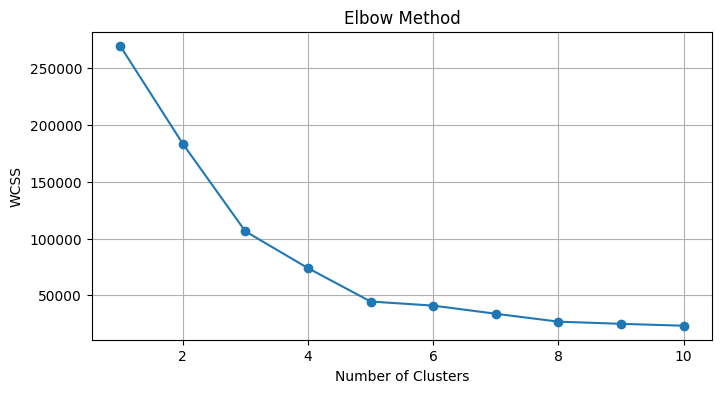

In [13]:
# 4. Elbow Method to Find Optimal Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [14]:
# 5. Apply K-Means with Optimal Clusters (e.g., 5 based on elbow curve)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [15]:
# 6. Add Cluster to Dataset
df['Cluster'] = y_kmeans

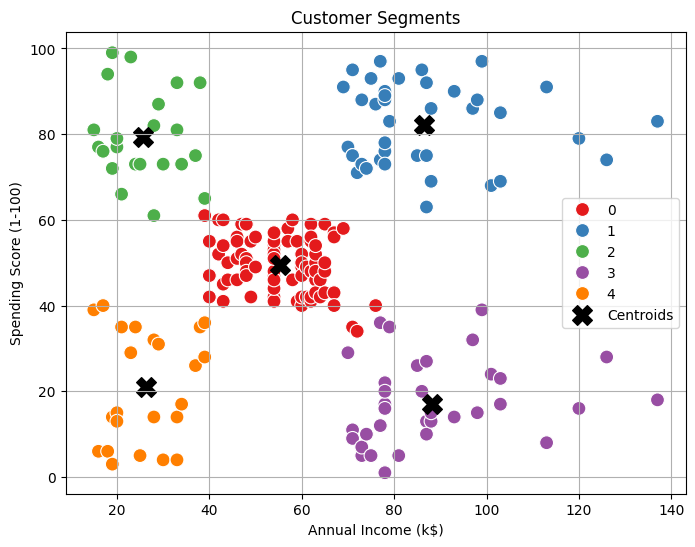

In [16]:
# 7. Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', label='Centroids', marker='X')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()
